In [2]:
import time
from math import sin, cos, sqrt, atan2, radians, pow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

DATA_new=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\space_time_total_catalogue.csv")


In [942]:
list_TR=[]
b=1.2
DATA_new['Time']=DATA_new['Time'].astype(np.datetime64)
for e in DATA_new.index:
    aft=int(DATA_new['Aftershock'].iloc[e])
    main=int(DATA_new['Mainshock'].iloc[e])
    if main <11191:
        dtime=((DATA_new['Time'].iloc[e]-DATA_new['Time'].iloc[main])).total_seconds()
        mag=DATA_new['Magnitude'].iloc[main]
        r=((DATA_new['Spacetime_distance'].iloc[e])/(dtime*pow(10,(-b*(mag)))))
        r=r*r**0.22
        T=dtime*pow(10,-b*((mag)/2))
        R=(r*pow(10,(-b*(mag)/2)))
        list_TR.append([T,R,mag,e])

In [943]:
TR=pd.DataFrame(list_TR)
TR.rename({0:'T',1:'R',2:'Magnitude',3:'Index'},axis=1,inplace=True)


<function matplotlib.pyplot.show(*args, **kw)>

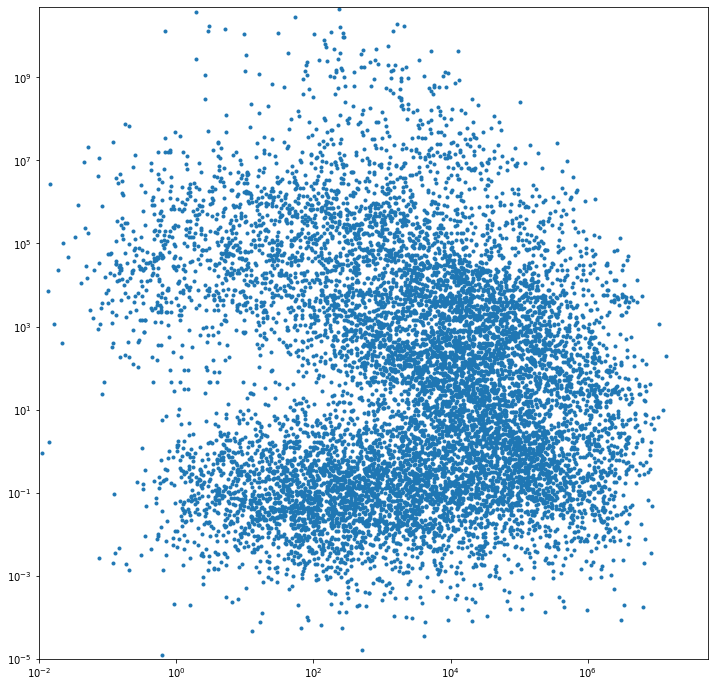

In [90]:
from scipy.stats import gaussian_kde
f, a = plt.subplots(figsize=(12,12))
xy = np.vstack([TR['T'],TR['R']])
z = gaussian_kde(xy)(xy)
bins = np.logspace(0,7,num=30) 
s = a.scatter(TR['T'],TR['R'],s=9) #,c=z, s=10, cmap='jet', edgecolor='', label=None, picker=True, zorder=2 ) 

plt.xscale('log')
plt.yscale('log')

plt.ylim((0.00001, 50000000000))
plt.xlim((0.01, 57000000))
plt.show

In [946]:
indici=[]
for tr in TR.index:
    if TR['T'].iloc[tr]*TR['R'].iloc[tr]>7400 and TR['T'].iloc[tr]>120: #and TR['R'].iloc[tr]>0.001  :
        indici.append(TR['Index'].iloc[tr])
indici=pd.Series(indici)
indici.rename='index'
indici = indici.to_frame('index')
DECLUSTERED=pd.merge(DATA_new,indici,left_index=True,right_on='index')
df=DECLUSTERED
df.sort_values(by='Time',ascending=True,inplace=True)
num=pd.Series([i for i in reversed(range(0,int(df.size/len(df.columns))))])  #range(0,2,-1) gives [2,1], riversed gives [1,0]
df=pd.concat([df,num],axis=1)
df.set_index(0,inplace=True)
df=df[::-1]

In [947]:
import datetime
from ipykernel import kernelapp as app
from math import sqrt
a=df[(df['Magnitude']>4.5)& (df['Time']>datetime.datetime(1985,1,1,1,1))& (df['Time']<datetime.datetime(2020,4,30,1,1,1))]
tot_time=int((end_time1-starting_time1).total_seconds())
interv=5
interv_time=tot_time/interv
#tt=3600*24*365*10
starting_time1=a['Time'].iloc[0]
end_time1=a['Time'].iloc[len(a.index)-1]
events_interval=[]
diff_value=[]
for i in range(len(a.index)):
    diff=(a['Time'].iloc[i]-starting_time1).total_seconds()
    diff_value.append(diff)
a['Diff_time']=diff_value
cnt=0
while cnt <interv:  #890
    condition=a[(a['Diff_time']>=(interv_time*cnt))&(a['Diff_time']<(interv_time*(cnt+1)))].loc[:,'Diff_time']
    condition1=condition.to_list()
    events_interval.append(condition1)
    cnt+=1
number_time=pd.DataFrame(events_interval)
number_time_count=number_time.count(axis=1)
import random
nt=number_time_count.to_numpy()
lamb=sum(nt)/len(nt)
#chi_cc=[]
lamb_list=[]
#for i in nt:
#    chi_value=((i-lamb)**2)/lamb
#    from statistics import mean 
#    from scipy.stats import chisquare, chi2_contingency
    #test,d=chisquare(nt_choice,s)
 #   chi_cc.append(chi_value)
for i in chi_cc:
    lamb_list.append(lamb)
cc=chisquare(nt,lamb_list)
#sum(chi)
var_list=[]
Yk_list=[]
for b in nt:
    Yk=sqrt(b+3/8)
    Yk_list.append(Yk)
Y=(sum(Yk_list)/len(nt))
for yk in Yk_list:
    var=(yk-Y)**2
    var_list.append(var)
bz=4*sum(var_list)
cc,bz,len(nt)-1

C:\Users\Ogeid99\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


(Power_divergenceResult(statistic=2.8000000000000003, pvalue=0.5918327134598556),
 2.6602979111298377,
 4)

In [830]:
nt

array([27, 35, 34, 60, 54], dtype=int64)

In [680]:
nt

array([54, 59, 62, 95, 83], dtype=int64)

In [687]:
nt

array([57, 56, 64, 93, 84], dtype=int64)